In [11]:
# IN HERE WE IMPORT THE NECESSARY MODULES #############################################

# MANIPULATING ARRAYS AND MATRICES
import numpy as np
# NumPy (http://www.numpy.org/) is the fundamental package for numerical computation, 
# manipulating arrays and matrices.

# READING AND WRITING IMAGES
import imageio

# CONVERT IMAGE TO GRAYSCALE, HISTOGRAMS
from skimage.color import rgb2gray
from skimage import exposure
from skimage import img_as_float
from skimage import filters
from skimage.filters import rank
from skimage.morphology import disk
import skimage
# Scikit-image (https://scikit-image.org/) is the collection of algorithms for image processing
# http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html
# http://scikit-image.org/docs/stable/api/skimage.color.html#rgb2gray

# PLOTTING LIBRARY FOR PYTHON
import matplotlib
import matplotlib.pyplot as plt
# Matplotlib (https://matplotlib.org/) is the plotting package

# pag 85 - 87
'''
NumPy (http://www.numpy.org/) is the fundamental package for numerical
computation, manipulating arrays and matrices.

Scikit-learn (https://scikit-learn.org/) is the machine learning library.

Scikit-image (https://scikit-image.org/) is the collection of algorithms for
image processing

Scipy (https://www.scipy.org/) is the collection of algorithms for scientific
computing.

Matplotlib (https://matplotlib.org/) is the plotting package.

Pillow (https://python-pillow.org/) is the python imaging library.

OpenCV-Python (https://pypi.org/project/opencv-python/) is a Python
wrapper for the OpenCV C++ implementation. It supports a lot of algorithms
related to computer vision and machine learning.

Image Processing Modules:

Scikit-image
Scipy.ndimage
Pillow
OpenCV-Python


'''


########################################################################################

'\nNumPy (http://www.numpy.org/) is the fundamental package for numerical\ncomputation, manipulating arrays and matrices.\n\nScikit-learn (https://scikit-learn.org/) is the machine learning library.\n\nScikit-image (https://scikit-image.org/) is the collection of algorithms for\nimage processing\n\nScipy (https://www.scipy.org/) is the collection of algorithms for scientific\ncomputing.\n\nMatplotlib (https://matplotlib.org/) is the plotting package.\n\nPillow (https://python-pillow.org/) is the python imaging library.\n\nOpenCV-Python (https://pypi.org/project/opencv-python/) is a Python\nwrapper for the OpenCV C++ implementation. It supports a lot of algorithms\nrelated to computer vision and machine learning.\n\nImage Processing Modules:\n\nScikit-image\nScipy.ndimage\nPillow\nOpenCV-Python\n\n\n'

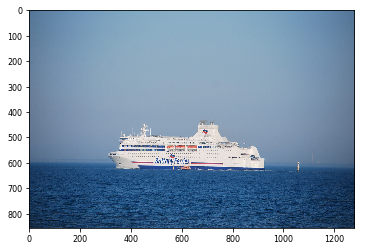

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (856, 1280, 3)
Size: 3287040
Max: 255
Min: 0
Contrast: 255
Mean (Brightness): 133.44707061672509
STDD: 51.05563038525983



In [12]:
# READING AND PRESENTING IMAGES ########################################################

# PRINT NORMAL IMAGE
def printImage( img ):
    
    plt.imshow( img )
    plt.show()

# PRINT GRAY IMAGE
def printGrayImage( img ):
    
    plt.imshow( img, cmap=plt.cm.gray )
    plt.show()

# PRINT IMAGE INFORMATION
def imageInfo( img ):
    
    print( "Type:" +    str( type( img ) ) )
    print( "DType: " +  str( img.dtype  )   )
    print( "Shape: " +  str( img.shape  )   )
    print( "Size: "  +  str( img.size   )   )
    print( "Max: "   +  str( img.max()  )   )
    print( "Min: "   +  str( img.min()  )   )
    print( "Contrast: " + str( img.max() - img.min() ) )
    print( "Mean (Brightness): "  +  str( img.mean() )   )
    print( "STDD: "  +  str( img.std()  )   )
    print()
    
# READ IMAGE
img_to_read_path = "boat-ferry-departure-crossing-sea-2733061.jpg"
img = imageio.imread( img_to_read_path )
# https://pypi.org/project/imageio/

# TURN IMAGE INTO NP ARRAY
img = np.array( img )
printImage( img )
imageInfo( img )
########################################################################################

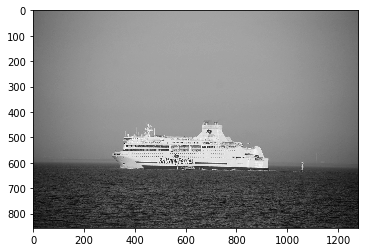

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (856, 1280, 3)
Size: 3287040
Max: 255
Min: 0
Contrast: 255
Mean (Brightness): 133.44707061672509
STDD: 51.05563038525983



In [8]:
# CONVERSION TO GRAYSCALE ##############################################################
img_gray = rgb2gray(img)
printGrayImage( img_gray )
imageInfo( img )
########################################################################################

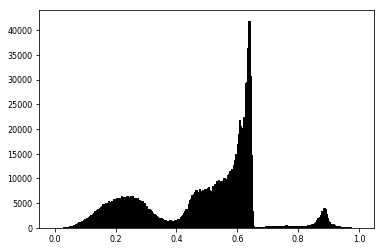

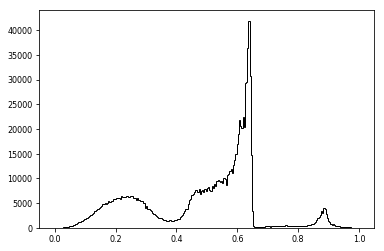

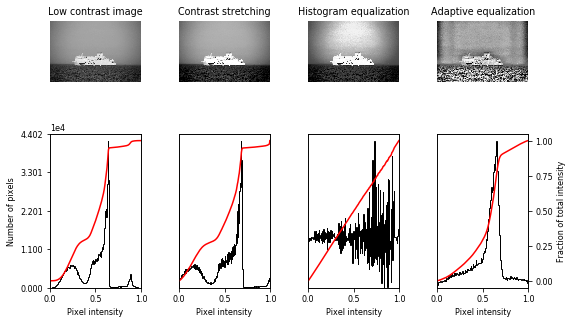

In [17]:
# HISTOGRAM ############################################################################

# HISTOGRAMS ARE A USEFUL TOOL IN DETERMINING THE QUALITY OF AN IMAGE
# FREQUENCY LOWER PIXEL VALUES VERY HIGH  --> PIXELS MISSING FROM THAT END ( DARK IMAGE  )
# FREQUENCY HIGHER PIXEL VALUES VERY HIGH --> SATURATION                   ( BRIGHT IMAGE)

# HISTOGRAMS CAN BE USED TO ENHANCE OR MODIFY THE CARACTERRISTICS OF AN IMAGE, PARTICULARY ITS CONTRAST



imgplot  = plt.hist(img_gray.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k' )
plt.show()

imgplot = plt.hist(img_gray.ravel(), bins=256, histtype='step', color='black')
plt.show()

# https://github.com/scikit-image/scikit-image/blob/master/doc/examples/color_exposure/plot_equalize.py
matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_gray

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()







# HISTOGRAM EQUALIZATION:
# COMPUTE THE HISTOGRAM
# NORMALIZE THE HISTOGRAM TO [0; 1]
def normalizeHistogram( original_histogram ):
    
    sum_probs_gray_level_values = numpy.ndarray.sum( original_histogram )
    number_of_gray_level_values = len( set( original_histogram ) )
    
    normalizedHistogram = round( (number_of_gray_level_values - 1 ) * (sum_probs_gray_level_values - min( original_histogram ) )/( 1 - min( original_histogram ) ) )
    
     
    
    return normalizedHistogram;
    # pag 132
    # https://en.wikipedia.org/wiki/Histogram_equalization#Of_color_images

    
    

#I Calcule the cumulative distribution function

def contrastStretching( gray_image ):
    # https://pythontic.com/image-processing/pillow/contrast%20stretching
    # pag 135
    return gray_image



########################################################################################

In [1]:
# IMAGE ENHANCEMENT ####################################################################

# IMPROVING ( DIGITAL IMAGE PROCESSING ):
# sHARPENING
# REMOVING NOISE
# DEBLURRING

# RENDERING ( DIGITAL IMAGE PROCESSING ):
# FINDING EDGES
# BLURRING AN IMAGE

# COMPRESSING ( DIGITAL IMAGE PROCESSING ):

# INPAINTING ( DIGITAL IMAGE PROCESSING ):




# FUNCTION TO:
# BRIGHTEN A IMAGE
def imageAddition( img, img_or_int ):
    
    return img + img_or_int

# FUNCTION TO:
# DARKEN A IMAGE, 
# DETERMINE IF TWO IMAGES ARE THE SAME
# REMOVE BACKGROUND
# FIND BOUNDARIES
def imageSubtraction( img, img_or_int ):
    
    return img - img_or_int

# FUNCTION TO:
# DYNAMIC SCALLING ( BRIGHTENING PROCESSO MORE NATURAL THAN ADDING)
# ADJUST CONTRAST AND BRIGHTNESS ( THEORICAL CLASSES)
def imageMultiplication( img, img_or_int, b ):
    
    return img * img_or_int + b

# FUNCTION TO:
# EXTRACT THE BACKGROUND FROM AN IMAGE
# ANTI DYNAMIC SCALING ( DARKENING PROCESS MORE NATURAL THAN SUBTRACTING )
def imageDivision( img, img_or_int ):
    
    return img // img_or_int


# FUNCTION TO:
# FIND DIFFERENCES BETWEEN TWO IMAGES
def xorOperation( img1, img2 ):
    
    xor_image = (img1 and not img2) or (not img1 and img2)

    return xor_image
# https://stackoverflow.com/questions/432842/how-do-you-get-the-logical-xor-of-two-variables-in-python

# FUNCTION TO:
# BLUR IMAGE
# REDUCE THE AMOUNT OF NOISE
def blurImage( img ):
    
    bluredImg = skimage.filters.median( img )
    
    return bluredImg;
'''
I The simplest and most widely known spatial smoothing filter.
I It uses convolution with a mask whose coefficients have a value
of 1, and divides the result by a scaling factor (the total number
of elements in the mask).
I Also known as box filter.
'''

# http://scikit-image.org/docs/dev/api/skimage.filters.html

# FUNCTION TO:
# NORMALIZE IMAGE
def normalizeImage( img ):
    
    return ( img-img.min() ) / ( img.max()-img.min() );

# FUNCTION TO:
# SHARPEN IMAGE
# USING:
# LINEAR HIGH PASS FILTERS
def createdSharpenedImageByLaplacian( img ):
    
    return skimage.filters.laplace( img )

# FUNCTION TO:
# SHARPEN IMAGE
# PAG 127
def unsharpMasking( orig_image ):
    
    selem = disk(20)
    
    mean_image = rank.mean( orig_image, selem=selem )
    
    altered_image = orig_image - blurImage( mean_image )
    
    altered_image = orig_image + altered_image
    
    return altered_image

# FUNCTION TO:
# SMOOTH A IMAGE
# BLUR IMAGE
# REDUCE NOISE
'''
I Linear LPFs can be implemented using 2D convolution masks
with non-negative coefficients.
I Linear LPFs are typically used to either blur an image or reduce
the amount of noise present in the image.

Examples: Mean (averaging) filter, Gaussian, rank filters

'''

# FUNCTION TO:
# HIGH BOOST FILTERING

# FUNCTION TO:
# PRESERVE EDGES
# NON-LINEAR FILTERS RANK ORDERED
# MEDIAN FILTER DOES NOT BLUR EDGES
# PERFORM IMAGE SMOOTHING ( AND REMOVE NOISE )
'''
Non-linear filters: Rank-ordered.
I Rank-ordered are interesting when:
I Information about the features are known;
I Background varies rapidly;
I Contrast between objects and background on the image is
known.
'''

def thresholdImage( image, threshold_limit ):
    
    image_to_alter = image
    
    for pixel_value in image_to_alter:
        
        if pixel_value >= threshold_limit:
            
            pixel_value = 1
            
        else:
            
            pixel_value = 0
            
    binary_image = image_to_alter
            
    return binary_image


# FUNCTION TO:
# WATERSHED SEGMENTATION


'''

The process of edge detection consists of three main steps:
I Noise reduction: smoothing techniques.
I Detection of edge points.
I Edge localization: Hough transform.


'''

# FUNCTION TO:
# FIND HORIZONTAL AND VERTICAL EDGES
# FIRST DERIVATIVE FILTERS
# SOBEL FILTER
# PREWITT FILTER
# PAG 192



# FUNCTION TO:
# SECOND DERIVATIVE FILTERS
# LAPLACIAN FILTER
# GAUSSIAN TO OFFSET LAPLACIAN NOISE EFFECT



# FUNCTION TO:
# EDGE LOCALIZATION
# HOUGH TRANSFORM

'''
I Hough transform: a global method for edge linking and boundary
detection.

'''
'''
What are the steps in the process?
I Capture image ! isolate fish ! take measurements ! make
decision

'''




img_gray = imageAddition( img_gray, 20 )
printGrayImage( img_gray )

img_gray = normalizeImage( img_gray )
printGrayImage( img_gray )

########################################################################################

NameError: name 'img_gray' is not defined

In [6]:
# WRITE IMAGE TO DISK ##################################################################
def writeImageToDisk( img_path, img ):
    
    imageio.imwrite( img_path , img )


writeImageToDisk( 'writed_image.jpg', img_gray )
########################################################################################

#http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html